# Cálculo de autovalores
#### https://meet.noysi.com/metodosnumericos1

## Teorema de Gersgorin

La siguientes funciones calculan los discos del Teorema de Gersgorin y los representan.

In [16]:
def Gershgorin(A):
    return zip(A.diagonal(),vector([sum([abs(k) for k in fila]) for fila in A])-vector(map(abs,A.diagonal())) )
def discosG(A):
    B=matrix(CDF,A)
    cr=Gershgorin(B)
    discos= sum([ circle([c.real(),c.imag()],r,fill=true,alpha=0.2) for c,r in cr])
    return discos

[ 4 -1  1]
[-1 -3  1]
[ 1  2  5] [-3.426743094681910?, 3.757942566075653?, 5.668800528606257?]

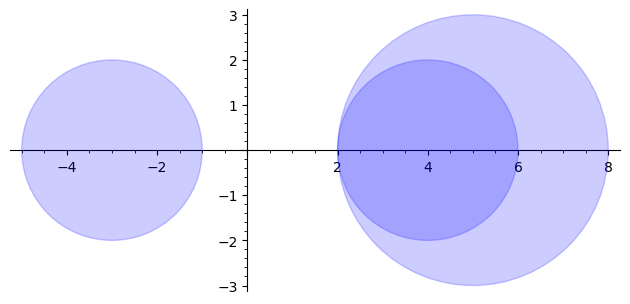

In [2]:
A = matrix([[4,-1,1],[-1,-3,1],[1,2,5]])
show(A,A.eigenvalues())
discosG(A)

<div class="alert alert-block alert-info">
    <strong>Ejercicio 1. </strong> 

a) Aplicar el Teorema de Gersgorin para localizar los autovalores de la matriz 
$$A=\left(\begin{array}{rrr} 15.0 & -1.0 & 1.0 \\ 2.0 & -5.0 & 1.0 \\ 1.0 & 1.0 & -3.0 \end{array}\right). $$

b) Aplicar el método de la potencia para aproximar el autovalor de módulo máximo. En cada paso, normaliza el vector. Detener el método cuando $\|A v_k - \lambda_k v_k\|_2<10^{-2}$, donde $\lambda_k$ es el autovalor aproximado obtenido y $v_k$ es el vector normalizado correspondiente a dicha iteración (que es una aproximación del autovalor). Aplicar el método con varios pasos y representar los valores obtenidos para $\|A v_k - \lambda_k v_k\|_2<10^{-2}$. 
    
c) Aplicar el método de la potencia para aproximar el autovalor de módulo máximo, pero tomando como vector inicial uno de los autovectores correspondientes a un autovalor que no sea el de módulo máximo. Realizar $100$ iteraciones del método y representar el error residual $\|A v_k - \lambda_k v_k\|_2$. 

d) Aplicar el método de la potencia inversa para aproximar el autovalor de módulo mínimo, con las mismas consideraciones que en el apartado b).

e) Aplicar el método de la potencia inversa desplazada para encontrar el autovalor restante, con las mismas consideraciones que en el apartado b).
   
</div>

[15.0 -1.0  1.0]
[ 2.0 -5.0  1.0]
[ 1.0  1.0 -3.0] [14.958148652677082, -2.639723010334766, -5.318425642342307]

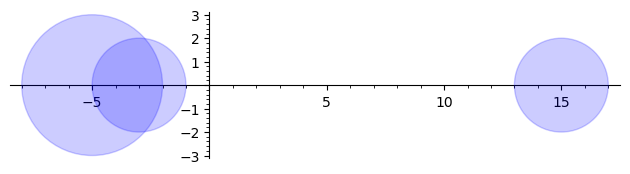

In [4]:
A = matrix(CDF,[[15,-1,1],[2,-5,1],[1,1,-3]])
show(A,A.eigenvalues())
discosG(A)

In [7]:
v0 = vector(CDF,[1,1,1])
v0

(1.0, 1.0, 1.0)

In [17]:
v1 = A*v0
l1 = v0.conjugate()*v1/(v0.conjugate()*v0)
v1 = v1.normalized()
l1, (A*v1-l1*v1).norm(2)

(4.0, 11.452168961076477)

In [22]:
v2 = A*v1
l2 = v1.conjugate()*v2/(v1.conjugate()*v1)
v2 = v2.normalized()
l2, (A*v2-l2*v2).norm(2)

(14.330434782608696, 1.3641109299063303)

In [23]:
v3 = A*v2
l3 = v2.conjugate()*v3/(v2.conjugate()*v2)
v3 = v3.normalized()
l3, (A*v3-l3*v3).norm(2)

(14.664465593249199, 0.5678578314868246)

In [33]:
# Método de la potencia
v0 = vector(CDF,[1,1,1])
err = []
for _ in range(10): 
    v1 = A*v0
    l1 = v0.conjugate()*v1/(v0.conjugate()*v0) # Rayleigh
    v1 = v1.normalized()
    err.append( (A*v1-l1*v1).norm(2) )
    v0 = copy(v1)

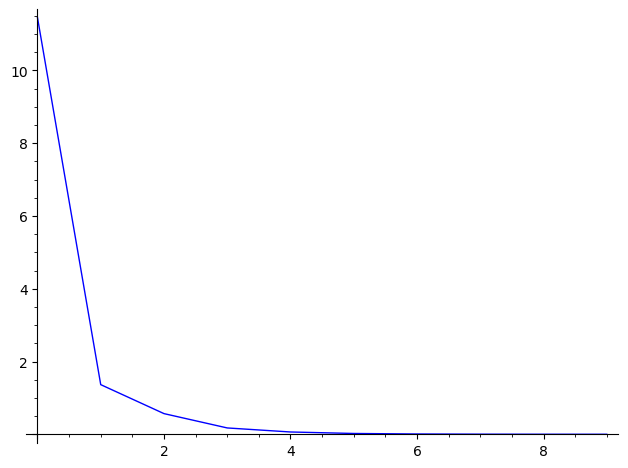

In [30]:
list_plot(err,plotjoined=true)

In [34]:
A.eigenvectors_right()

[(14.958148652677082,
  [(0.9928558625160511, 0.10255006462425884, 0.0609977090804967)],
  1),
 (-2.639723010334766,
  [(-0.03190857594998693, 0.36686740517079436, 0.9297258465827934)],
  1),
 (-5.318425642342307,
  [(0.06518858130176128, 0.9057410148550928, -0.41878832705452773)],
  1)]

In [40]:
v0 = vector(CDF,[-0.03190857594998693, 0.36686740517079436, 0.9297258465827934])
err = []
aut = []
for _ in range(50):
    v1 = A*v0
    l1 = v0.conjugate()*v1/(v0.conjugate()*v0) # Rayleigh
    aut.append(l1)
    v1 = v1.normalized()
    err.append( (A*v1-l1*v1).norm(2) )
    v0 = copy(v1)
l1

14.958148652677076

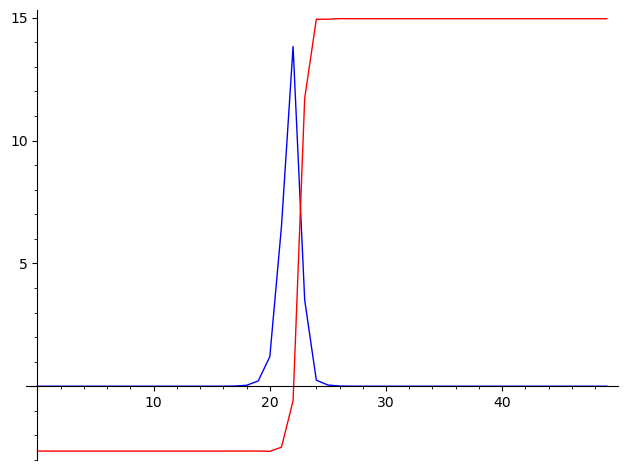

In [46]:
list_plot(err,plotjoined=true) + list_plot(aut,plotjoined=true,color='red')

In [9]:
A = matrix(CDF,[[15,-1,1],[2,-5,1],[1,1,-3]])
A.eigenvectors_right()

[(14.958148652677082,
  [(0.9928558625160511, 0.10255006462425884, 0.0609977090804967)],
  1),
 (-2.639723010334766,
  [(-0.03190857594998693, 0.36686740517079436, 0.9297258465827934)],
  1),
 (-5.318425642342307,
  [(0.06518858130176128, 0.9057410148550928, -0.41878832705452773)],
  1)]

In [8]:
v0 = vector(CDF,[1,1,1])
for _ in range(10):
    v1 = A\v0
    l1 = 1 / ( v0.conjugate()*v1/(v0.conjugate()*v0) ) # Rayleigh
    v1 = v1.normalized()
    v0 = copy(v1)
v0, l1, (A*v0-l1*v0).norm(2)

((-0.03188562893822217, 0.36720320318564914, 0.9295940588436509),
 -2.6396663153862927,
 0.0009682037874781443)

In [13]:
v0 = vector(CDF,[1,1,1]).normalized()
B = A - (-6)*matrix.identity(3)
for _ in range(10):
    v1 = B\v0
    l1 = 1 / ( v0.conjugate()*v1/(v0.conjugate()*v0) ) + (-6) # Rayleigh
    v1 = v1.normalized()
    v0 = copy(v1)
v0, l1, (A*v0-l1*v0).norm(2)

((0.06518857301668916, 0.9057411390291908, -0.41878805978460254),
 -5.318425689137747,
 7.897452564314229e-07)

<div class="alert alert-block alert-info">
    <strong>Ejercicio 2. </strong> 

a) Utilizar el método de la potencia (desplazando los autovalores si es necesario) para calcular el radio espectral de la matriz
$$M=\left(\begin{array}{rrr} 2.0 & -2.0 & 1.0 \\ 3.0 & 2.0 & 1.0 \\ 1.0 & 1.0 & -1.0 \end{array}\right).$$
Dibuja en cada paso del método el módulo del error residual $\|A v_k - \lambda_k v_k\|$ obtenido. Detener el método cuando $\|A v_k - \lambda v_k\|_2<10^{-2}$.
    
b) Calcula el resto de los autovalores.
   
</div>

[ 2.0 -2.0  1.0]
[ 3.0  2.0  1.0]
[ 1.0  1.0 -1.0] [2.1655973673642466 + 2.2529650837106616*I,
 2.165597367364246 - 2.2529650837106616*I,
 -1.3311947347284943]

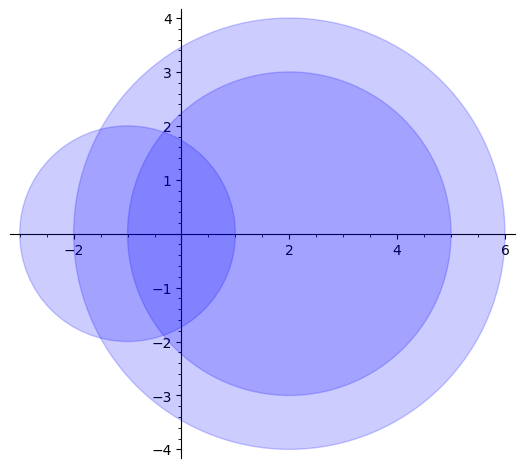

In [17]:
A = matrix(CDF,[[2,-2,1],[3,2,1],[1,1,-1]])
show(A,A.eigenvalues())
discosG(A)

In [27]:
# Método de la potencia
v0 = vector(CDF,[1,1,1]).normalized()
err = []
B = A - (i)*matrix.identity(3)
for _ in range(100): 
    v1 = B*v0
    l1 = v0.conjugate()*v1 + (i) # Rayleigh
    v1 = v1.normalized()
    err.append( (A*v1-l1*v1).norm(2) )
    v0 = copy(v1)
l1

2.1655973673642475 - 2.2529650837106625*I

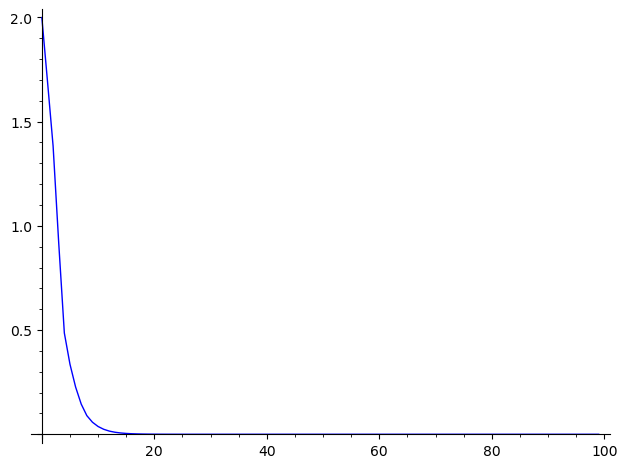

In [26]:
list_plot(err,plotjoined=true)

<div class="alert alert-block alert-info">
    <strong>Ejercicio 3. </strong> 
    
a) Aplicar 10 pasos del método QR para aproximar los autovalores de la matriz 
$$\left(\begin{array}{rrr} 15.0 & -1.0 & 1.0 \\ 2.0 & -5.0 & 1.0 \\ 1.0 & 1.0 & -3.0 \end{array}\right). $$
La factorización QR de cada paso, calcularla usando el método `QR` de Sage.

b) Obtener una factorización QR de la matriz anterior, utilizando reflexiones de Householder. 
    
</div>

In [29]:
A = matrix(CDF,[[15,-1,1],[2,-5,1],[1,1,-3]])
Q,R = A.QR()
Q,R

(
[ -0.9890707100936804  0.11420129087111296 -0.09325875614736703]
[ -0.1318760946791574  -0.9680755579997421  0.21316287119398178]
[ -0.0659380473395787  0.22313175293278995   0.9725555998225417],

[-15.165750888103101  1.5825131361498888 -0.9231326627541017]
[                0.0   4.949308252060386 -1.5232695259269988]
[                0.0                 0.0   -2.79776268442101]
)

In [38]:
A1 = copy(A)
for _ in range(10):
    Q,R = A1.QR()
    A1 = R*Q
A1

[   14.958154991507488   -2.7018984276569835   -1.2907363213500551]
[4.755216899095606e-05    -5.318506654018995  -0.18189639701311516]
[3.110068468667458e-08  0.001099752029524515     -2.63964833748849]

In [39]:
# b)
c = A.column(0)

In [40]:
u = c - c.norm(2)*vector([1,0,0])
v = u/u.norm(2)
P = matrix.identity(3)- 2*v.column()*v.row()
P

[ 0.9890707100936805 0.13187609467915756 0.06593804733957878]
[0.13187609467915756 -0.5912565680749442 -0.7956282840374721]
[0.06593804733957878 -0.7956282840374721   0.602185857981264]

In [41]:
P*A

[    15.165750888103103    -1.5825131361498896     0.9231326627541018]
[2.9976021664879227e-15     2.0287784616580913     1.9275043787166297]
[1.5543122344752192e-15      4.514389230829046    -2.5362478106416853]

In [36]:
A[1:,1:]

[-5.0  1.0]
[ 1.0 -3.0]

<div class="alert alert-block alert-info">
    <strong>Ejercicio 4. </strong> 
    
Encontrar una matriz tal que uno de los discos de Gersgorin no contenga ningún autovalor.
    
</div>